In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv( r'C:\Users\MrLaptop\Desktop\language.csv',nrows=10000)
english_sentences = data["English words/sentences"].tolist()
french_sentences = data["French words/sentences"].tolist()

In [2]:
english_sentences = [str(sentence) for sentence in english_sentences]
french_sentences = [str(sentence) for sentence in french_sentences]
print(len(english_sentences))
print(len(french_sentences))

10000
10000


In [3]:
# Tokenize the English sentences
tokenizer_eng = Tokenizer()
tokenizer_eng.fit_on_texts(english_sentences)
eng_seq = tokenizer_eng.texts_to_sequences(english_sentences)

#Tokenize the french Sentences 
tokenizer_fr = Tokenizer()
tokenizer_fr.fit_on_texts(french_sentences)
fr_seq = tokenizer_fr.texts_to_sequences(french_sentences)


vocab_size_eng = len(tokenizer_eng.word_index) + 1
vocab_size_fr = len(tokenizer_fr.word_index) + 1

# applying the padding
max_length = max(len(seq) for seq in eng_seq + fr_seq)
eng_seq_padded = pad_sequences(eng_seq, maxlen=max_length, padding='post')
fr_seq_padded = pad_sequences(fr_seq, maxlen=max_length, padding='post')

In [4]:
embedding_dim = 256
units = 512

# Encoder
encoder_inputs = Input(shape=(max_length,))
enc_emb = Embedding(input_dim=vocab_size_eng, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_length,))
dec_emb_layer = Embedding(input_dim=vocab_size_fr, output_dim=embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_fr, activation='softmax')
output = decoder_dense(decoder_outputs)

# the model that connects the encoder and decoder
model = Model([encoder_inputs, decoder_inputs], output)

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
# pip install pydot

In [6]:

from tensorflow.keras.utils import plot_model

#  model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [7]:
X_train, X_val, y_train, y_val = train_test_split(eng_seq_padded, fr_seq_padded, test_size=0.1)
history = model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val), epochs=6, batch_size=64)

Epoch 1/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.6499 - loss: 3.2785 - val_accuracy: 0.6885 - val_loss: 2.1716
Epoch 2/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 27s 194ms/step - accuracy: 0.6991 - loss: 2.0429 - val_accuracy: 0.7274 - val_loss: 1.9782
Epoch 3/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.7346 - loss: 1.8166 - val_accuracy: 0.7417 - val_loss: 1.8327
Epoch 4/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.7496 - loss: 1.6289 - val_accuracy: 0.7540 - val_loss: 1.7472
Epoch 5/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - accuracy: 0.7619 - loss: 1.4744 - val_accuracy: 0.7586 - val_loss: 1.6759
Epoch 6/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.7683 - loss: 1.3510 - val_accuracy: 0.7657 - val_loss: 1.6313


In [8]:
loss, accuracy = model.evaluate([X_val, X_val], y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7609 - loss: 1.6355


In [9]:
print("The overall Accuracy: ")
print(accuracy)

The overall Accuracy: 
0.7656999826431274


In [10]:
np.shape(X_train)

(9000, 10)

# Sentence Translation Function

The following Python code defines a function `translate_sentence` that translates an English sentence into French using a trained sequence-to-sequence model. The function leverages a tokenizer to convert the input sentence into sequences of integers, which are then fed into the model to generate a translated sequence.



In [11]:
def translate_sentence(sentence):
    seq = tokenizer_eng.texts_to_sequences([sentence])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    translated = np.argmax(model.predict([padded, padded]), axis=-1)
    
    translated_sentence = []
    for i in translated[0]:
        if i in tokenizer_fr.index_word:
            translated_sentence.append(tokenizer_fr.index_word[i])
        else:
            translated_sentence.append(' ') 
        
    return ' '.join(translated_sentence)

input_sentence = "hello where are you"
translated_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}")
print(f"Translated: {translated_sentence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Input: hello where are you
Translated: ouvre les porte              


In [12]:
# Example translation
input_sentence = "hello where are you"
translated_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}")
print(f"Translated: {translated_sentence}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input: hello where are you
Translated: ouvre les porte              


In [13]:
val = "Hello subham kumar where.I really like you. Do you want to marry me. Hello"
list_sen = val.split('.')
print(list_sen)
new_list = []
for i in range(len(list_sen)):
    new_list.append(translate_sentence(list_sen[i]))
for i in range(len(new_list)):
    print(new_list[i])

['Hello subham kumar where', 'I really like you', ' Do you want to marry me', ' Hello']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
ouvre vous                
j'aime les                
est vous                
laissez                  


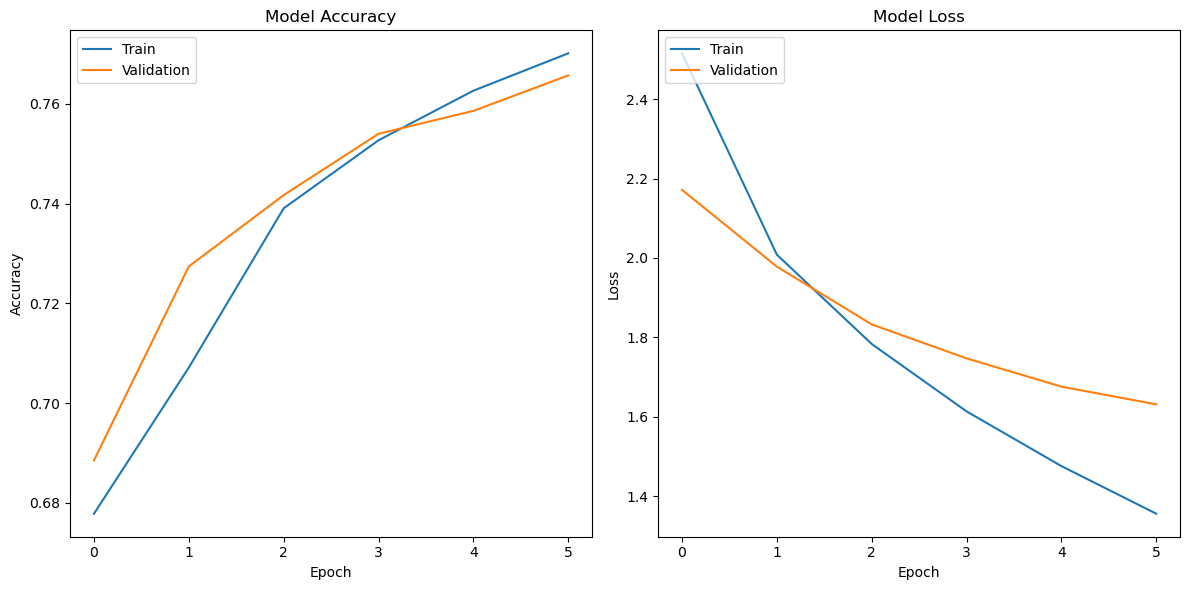

In [14]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()